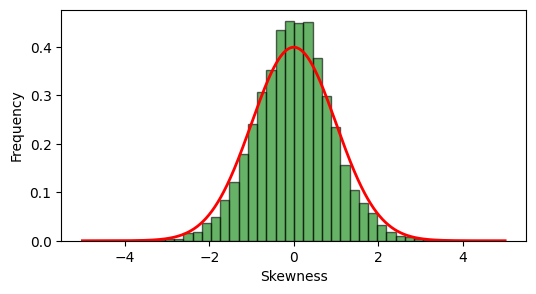

In [12]:
# generate n samples from a Gaussian distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import skew

# Set parameters
mu = 0
sigma = 1
n = 10
N = 10000 # number of experiments

# Generate samples
X = norm.rvs(loc=mu, scale=sigma, size= (N,n))
# compute skewness by scipy
s = np.sqrt(n/6) * skew(X, axis=1, bias=False)
# print(s)
# plot histogram of skewness
fig = plt.figure(figsize=(6, 3))
plt.hist(s, bins=30, density=True, alpha=0.6, color='g', edgecolor='k')
plt.xlabel('Skewness')
plt.ylabel('Frequency')
# plot the PDF of normal distribution
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, norm.pdf(xx), 'r', linewidth=2)
plt.show()


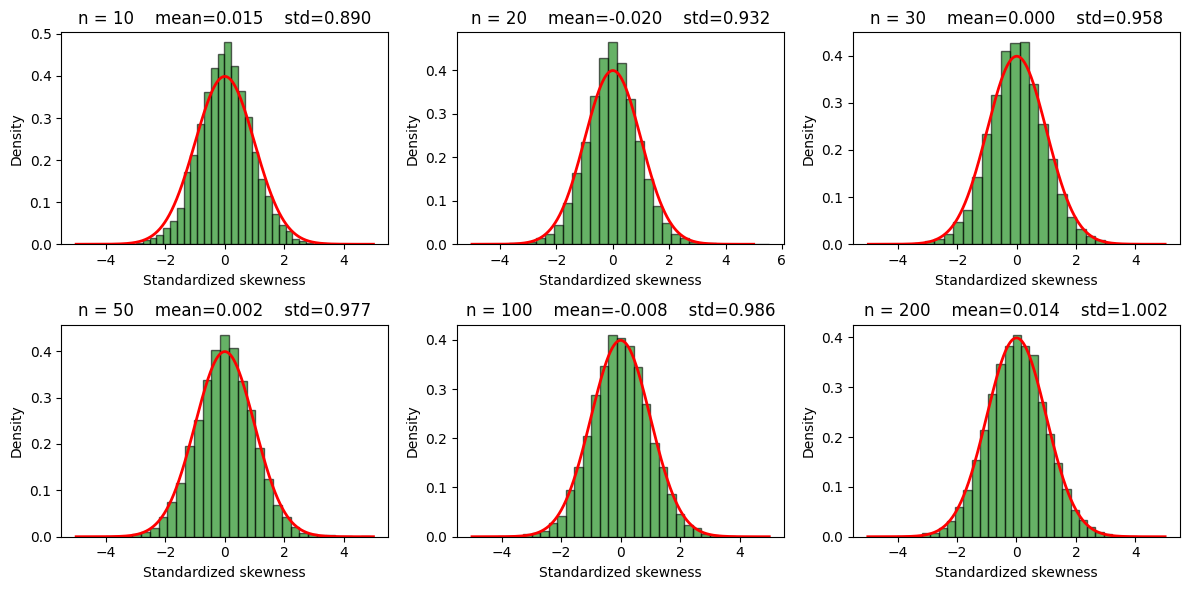

In [15]:
# repeat the experiment for n = 10, 20, 30, 50 and plot results
ns = [10, 20, 30, 50, 100, 200]

fig, axs = plt.subplots(2, 3, figsize=(12, 6))
axs = axs.flatten()

for ax, n in zip(axs, ns):
    # generate samples and compute standardized skewness
    X = norm.rvs(loc=mu, scale=sigma, size=(N, n))
    s_vals = np.sqrt(n / 6) * skew(X, axis=1, bias=False)

    # histogram + normal PDF
    ax.hist(s_vals, bins=30, density=True, alpha=0.6, color='g', edgecolor='k')
    ax.plot(xx, norm.pdf(xx), 'r', linewidth=2)

    # annotations
    ax.set_title(f'n = {n}    mean={s_vals.mean():.3f}    std={s_vals.std(ddof=1):.3f}')
    ax.set_xlabel('Standardized skewness')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()